<a href="https://colab.research.google.com/github/hwon-n/section2_project/blob/main/section2_project_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%%capture

# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
pip install -U pandas_profiling

     |████████████████████████████████| 261 kB 5.5 MB/s 
     |████████████████████████████████| 10.1 MB 36.6 MB/s 
     |████████████████████████████████| 62 kB 736 kB/s 
     |████████████████████████████████| 102 kB 10.1 MB/s 
     |████████████████████████████████| 675 kB 42.6 MB/s 
     |████████████████████████████████| 3.1 MB 40.8 MB/s 
     |████████████████████████████████| 596 kB 44.8 MB/s 
     |████████████████████████████████| 303 kB 48.7 MB/s 
     |████████████████████████████████| 812 kB 60.5 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5c8b38cc3690f80acffc3e0a65746ffeff49a724843eaec9aee8b1ec226a885a
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=b128bdf88dca5c30f8e60b507aac93bfc26734bbbccf0f907ec3502339705491
  

In [6]:
pip install category_encoders

     |████████████████████████████████| 82 kB 379 kB/s 


In [7]:
pip install eli5

     |████████████████████████████████| 106 kB 5.4 MB/s 


In [8]:
pip install shap

     |████████████████████████████████| 371 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509234 sha256=9b12a12dd7290a7b7a91653691424821aecb4cca96983b9ac4c696872bf6b294
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [9]:
pip install pdpbox

     |████████████████████████████████| 34.0 MB 43 kB/s 
     |████████████████████████████████| 13.1 MB 3.2 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=7f7e5a9c25cd12cb8b4bb61a92157a5beef2dbfc679ad38852dfc7aea159dc5b
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [10]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import eli5
from math import sqrt
from scipy.stats import uniform
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, r2_score, f1_score, mean_absolute_error, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

In [62]:
# 데이터 불러오기

train = pd.read_csv('/content/drive/MyDrive/Training Data.csv')

train.shape

(252000, 13)

In [63]:
train = train.sample(n = 10000, random_state = 42)
train.shape

(10000, 13)

In [ ]:
# train.profile_report()

In [64]:
# target 변수 설정 후 train, validation dataset 분할

target = 'Risk_Flag'

train, test = train_test_split(train, train_size = 0.8, random_state = 2, stratify = train[target])
train.shape, test.shape

((8000, 13), (2000, 13))

In [65]:
train, val = train_test_split(train, train_size = 0.8, random_state = 2, stratify = train[target])
train.shape, val.shape, test.shape

((6400, 13), (1600, 13), (2000, 13))

In [69]:
train.T

,187423,251738,128218,145115,95943,173536,35582,82595,126784,181827,230180,151639,216154,121954,200997,239311,155832,240732,123691,143393,132905,40184,204004,240271,193593,251180,233943,200777,241577,159680,119465,248282,167436,22324,162565,122932,216196,37517,243885,211201,...,49320,8807,139306,210629,114726,74356,201928,116022,31513,77493,203021,7221,54718,228585,240091,9330,215417,34736,149043,29213,42143,42295,58301,71084,183515,48892,231972,788,102650,189423,45861,194598,136992,67833,40331,173313,64052,161402,76226,165473
Id,187424,251739,128219,145116,95944,173537,35583,82596,126785,181828,230181,151640,216155,121955,200998,239312,155833,240733,123692,143394,132906,40185,204005,240272,193594,251181,233944,200778,241578,159681,119466,248283,167437,22325,162566,122933,216197,37518,243886,211202,...,49321,8808,139307,210630,114727,74357,201929,116023,31514,77494,203022,7222,54719,228586,240092,9331,215418,34737,149044,29214,42144,42296,58302,71085,183516,48893,231973,789,102651,189424,45862,194599,136993,67834,40332,173314,64053,161403,76227,165474
Income,4205428,4623501,2636776,4164102,5707684,5002101,7282131,4400405,1085710,5176469,9642799,6834599,6214082,7377482,7600748,9734121,8072596,1366550,1405492,5697624,4236914,2825737,7458916,7512268,2596508,9760959,9101162,5639809,4291977,385066,8141031,1015725,2506726,5415637,2707807,2113243,3602795,6060465,6043165,6471065,...,5010356,8382824,4407294,5303994,7245269,290909,75855,5323346,533359,6118487,5187890,5638906,6747015,195805,4761988,9777298,8365916,2718385,7721477,1915161,46244,3001816,8768562,4072094,606432,8693161,5900655,9443163,9585696,4147754,1612818,9305585,5173221,8786565,3143181,8056757,486603,5741460,4954873,8683788
Age,49,43,38,63,40,37,28,73,72,45,25,69,75,31,59,70,52,58,49,74,47,28,64,36,51,39,22,75,70,53,23,42,54,47,35,63,26,49,22,68,...,74,48,73,39,37,43,33,29,50,42,62,46,59,40,25,43,31,32,63,62,36,30,67,39,39,53,65,45,42,21,79,69,55,42,78,42,33,30,46,21
Experience,11,9,1,4,2,6,19,17,12,2,19,12,3,5,13,5,1,20,2,2,15,5,3,13,18,14,9,0,16,1,17,8,11,12,12,8,3,11,10,10,...,8,8,20,6,19,8,17,12,7,12,17,3,20,16,18,20,18,17,1,16,9,8,13,9,9,5,9,20,13,18,10,8,17,5,3,18,20,19,19,16
Married/Single,single,married,single,married,single,single,single,single,single,single,single,married,single,single,single,single,single,single,single,single,married,single,single,single,married,single,single,single,single,single,single,married,single,single,single,single,single,married,single,single,...,single,single,single,single,single,single,single,single,single,single,single,married,single,single,single,single,single,single,single,single,single,single,married,single,single,married,single,single,single,single,single,single,single,single,single,single,single,single,single,single
House_Ownership,rented,rented,rented,owned,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,owned,...,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented
Car_Ownership,yes,no,no,no,no,yes,no,yes,no,yes,no,no,no,yes,yes,no,yes,yes,no,yes,yes,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,yes,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,yes,no,yes
Profession,Technical_writer,Army_officer,Industrial_Engineer,Magistrate,Chartered_Accountant,Biomedical_Engineer,Flight_attendant,Biomedical_Engineer,Librarian,Graphic_Designer,Chartered_Accountant,Computer_operator,Geologist,Design_Engineer,Software_Developer,Surveyor,Computer_operator,Civil_engineer,Civil_servant,Fashion_Designer,Engineer,Industrial_Engineer,Industrial_Eng

In [51]:
value = train[target].value_counts(normalize = True)
value[0]

0.87625

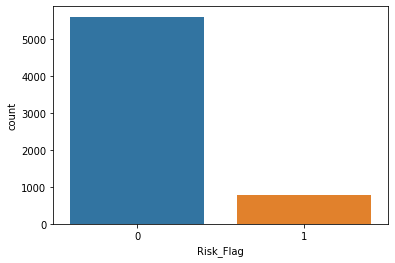

In [52]:
%matplotlib inline
ax = sns.countplot(data = train, x = target)
plt.show()

In [53]:
# 중복 데이터 확인

train.duplicated().value_counts()

False    6400
dtype: int64

In [54]:
# 결측치 확인

train.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

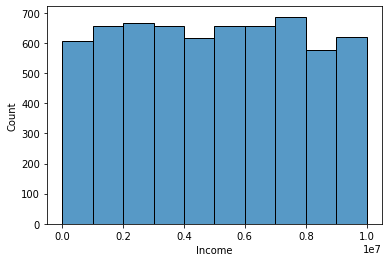

In [55]:
sns.histplot(train['Income'], bins = 10);

In [56]:
train['STATE'].value_counts()

Uttar_Pradesh        718
Maharashtra          653
Andhra_Pradesh       628
West_Bengal          556
Bihar                502
Tamil_Nadu           445
Madhya_Pradesh       356
Gujarat              309
Karnataka            278
Rajasthan            239
Haryana              224
Jharkhand            220
Telangana            186
Assam                174
Delhi                138
Kerala               133
Odisha               131
Punjab               119
Chhattisgarh         101
Uttarakhand           58
Jammu_and_Kashmir     47
Puducherry            42
Mizoram               27
Uttar_Pradesh[5]      23
Himachal_Pradesh      21
Tripura               21
Manipur               18
Sikkim                18
Chandigarh            15
Name: STATE, dtype: int64

In [57]:
train['CURRENT_HOUSE_YRS'].value_counts() 

11    1300
10    1290
13    1283
14    1269
12    1258
Name: CURRENT_HOUSE_YRS, dtype: int64

In [58]:
train.Experience.value_counts()

18    348
5     338
13    330
12    324
6     317
3     316
10    316
16    313
19    303
7     303
14    299
4     298
15    297
20    295
8     295
17    295
2     290
9     288
0     283
1     280
11    272
Name: Experience, dtype: int64

In [59]:
train.Profession.value_counts()

Technical_writer              151
Drafter                       151
Secretary                     148
Artist                        147
Technician                    143
Web_designer                  141
Software_Developer            141
Microbiologist                140
Physician                     139
Industrial_Engineer           139
Fashion_Designer              135
Hotel_Manager                 135
Statistician                  135
Chemical_engineer             134
Dentist                       134
Consultant                    134
Petroleum_Engineer            134
Scientist                     132
Librarian                     132
Graphic_Designer              131
Computer_hardware_engineer    131
Design_Engineer               128
Chartered_Accountant          128
Analyst                       128
Air_traffic_controller        127
Financial_Analyst             126
Politician                    125
Technology_specialist         124
Comedian                      124
Biomedical_Eng

In [60]:
train.Experience.unique()

array([11,  9,  1,  4,  2,  6, 19, 17, 12,  3,  5, 13, 20, 15, 18, 14,  0,
       16,  8, 10,  7])

In [70]:
# feature engineering

def age(age):
  if age > 60:
    return 'over 60'
  elif age > 40:
    return '4-50s'
  elif age > 30:
    return '30s'
  else:
    return 'under 30s'


def north(state):
  # 북부지역과 아닌 지역으로 나눔
  north_list = ['Sikkim', 'Uttar_Pradesh', 'Chandigarh', 'Manipur', 'Tripura', 'Mizoram', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 
                'Uttarakhand', 'Punjab', 'Assam', 'Telangana', 'Haryana', 'Rajasthan', 'Bihar', 'West_Bengal']
  if state in north_list:
    return 'North area'
  else:
    return 'Not North'

def exp(exp):
  if exp <= 2:
    return 'Entry'
  elif exp <= 5:
    return 'Intermediate'
  elif exp <= 10:
    return 'Mid'
  else:
    return 'Senior'


def job(job):
  tech = ['Software_Developer', 'Biomedical_Engineer', 'Computer_hardware_engineer', 'Technician', 'Civil_engineer', 'Industrial_Engineer', 'Mechanical_engineer', 'Computer_operator',
          'Air_traffic_controller', 'Aviator', 'Drafter', 'Technology_specialist', 'Surveyor', 'Drafter']
  science = ['Physician', 'Chemical_engineer', 'Scientist', 'Microbiologist', 'Biomedical_Engineer', 'Microbiologist', 'Petroleum_Engineer']

  if job in tech:
    return 'Technician'
  elif job in science:
    return 'Science'
  else:
    return 'Society'

def job_year(year):
  if year < 5:
    return 1
  elif year <= 10:
    return 2
  else:
    return 3


def feature(df):
  cols = ['ID', 'CITY']

  df.rename(columns = {
      'Id': 'ID',
      'Married/Single': 'MarriedOrSingle',
      'Risk_Flag': 'Not_Risk_Flag'
  }, inplace = True)
  df.drop(columns = cols, inplace = True)
  df.reset_index(drop = True, inplace = True)

  ranges = [-1.0, 0.4, 0.7, 1.0]
  label = ['Low', 'Mid', 'High']
  

  df.Age = df.Age.apply(age)
  df.Income = pd.cut(df.Income, bins = ranges, labels = label).astype('string')
  df.CURRENT_JOB_YRS = df.CURRENT_JOB_YRS.apply(job_year)
  df.STATE = df.STATE.apply(north)
  df.Experience = df.Experience.apply(exp)
  df.Profession = df.Profession.apply(job)
  df.CURRENT_HOUSE_YRS = df.CURRENT_HOUSE_YRS.apply(lambda x: 'over 12' if x > 12 else 'under 12')
  df.Not_Risk_Flag = df.Not_Risk_Flag.apply(lambda x: 1 if x == 0 else 0)

  return df

minmax = MinMaxScaler()

train['Income'] = minmax.fit_transform(train[['Income']])
val['Income'] = minmax.transform(val[['Income']])
test['Income'] = minmax.transform(test[['Income']])

train = feature(train)
val = feature(val)
test = feature(test)

train.head().T

,0,1,2,3,4
Income,Mid,Mid,Low,Mid,Mid
Age,4-50s,4-50s,30s,over 60,30s
Experience,Senior,Mid,Entry,Intermediate,Entry
MarriedOrSingle,single,married,single,married,single
House_Ownership,rented,rented,rented,owned,rented
Car_Ownership,yes,no,no,no,no
Profession,Society,Society,Technician,Society,Society
STATE,North area,Not North,North area,Not North,Not North
CURRENT_JOB_YRS,2,2,1,1,1
CURRENT_HOUSE_YRS,over 12,under 12,under 12,over 12,under 12


In [71]:
train.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6360,6361,6362,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373,6374,6375,6376,6377,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
Income,Mid,Mid,Low,Mid,Mid,Mid,High,Mid,Low,Mid,High,Mid,Mid,High,High,High,High,Low,Low,Mid,Mid,Low,High,High,Low,High,High,Mid,Mid,Low,High,Low,Low,Mid,Low,Low,Low,Mid,Mid,Mid,...,Mid,High,Mid,Mid,High,Low,Low,Mid,Low,Mid,Mid,Mid,Mid,Low,Mid,High,High,Low,High,Low,Low,Low,High,Mid,Low,High,Mid,High,High,Mid,Low,High,Mid,High,Low,High,Low,Mid,Mid,High
Age,4-50s,4-50s,30s,over 60,30s,30s,under 30s,over 60,over 60,4-50s,under 30s,over 60,over 60,30s,4-50s,over 60,4-50s,4-50s,4-50s,over 60,4-50s,under 30s,over 60,30s,4-50s,30s,under 30s,over 60,over 60,4-50s,under 30s,4-50s,4-50s,4-50s,30s,over 60,under 30s,4-50s,under 30s,over 60,...,over 60,4-50s,over 60,30s,30s,4-50s,30s,under 30s,4-50s,4-50s,over 60,4-50s,4-50s,30s,under 30s,4-50s,30s,30s,over 60,over 60,30s,under 30s,over 60,30s,30s,4-50s,over 60,4-50s,4-50s,under 30s,over 60,over 60,4-50s,4-50s,over 60,4-50s,30s,under 30s,4-50s,under 30s
Experience,Senior,Mid,Entry,Intermediate,Entry,Mid,Senior,Senior,Senior,Entry,Senior,Senior,Intermediate,Intermediate,Senior,Intermediate,Entry,Senior,Entry,Entry,Senior,Intermediate,Intermediate,Senior,Senior,Senior,Mid,Entry,Senior,Entry,Senior,Mid,Senior,Senior,Senior,Mid,Intermediate,Senior,Mid,Mid,...,Mid,Mid,Senior,Mid,Senior,Mid,Senior,Senior,Mid,Senior,Senior,Intermediate,Senior,Senior,Senior,Senior,Senior,Senior,Entry,Senior,Mid,Mid,Senior,Mid,Mid,Intermediate,Mid,Senior,Senior,Senior,Mid,Mid,Senior,Intermediate,Intermediate,Senior,Senior,Senior,Senior,Senior
MarriedOrSingle,single,married,single,married,single,single,single,single,single,single,single,married,single,single,single,single,single,single,single,single,married,single,single,single,married,single,single,single,single,single,single,married,single,single,single,single,single,married,single,single,...,single,single,single,single,single,single,single,single,single,single,single,married,single,single,single,single,single,single,single,single,single,single,married,single,single,married,single,single,single,single,single,single,single,single,single,single,single,single,single,single
House_Ownership,rented,rented,rented,owned,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,owned,...,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented,rented
Car_Ownership,yes,no,no,no,no,yes,no,yes,no,yes,no,no,no,yes,yes,no,yes,yes,no,yes,yes,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,yes,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,yes,no,yes
Profession,Society,Society,Technician,Society,Society,Technician,Society,Technician,Society,Society,Society,Technician,Society,Society,Technician,Technician,Technician,Technician,Society,Society,Society,Technician,Technician,Society,Technician,Science,Society,Technician,Society,Technician,Society,Society,Society,Science,Technician,Society,Society,Society,Technician,Society,...,Technician,Society,Technician,Society,Society,Society,Technician,Technician,Society,Society,Society,Society,Technician,Technician,Society,Society,Society,Society,Society,Science,Society,Society,Society,Society,Science,Technician,Society,Society,Society,Society,Society,Society,Science,Technician,Technician,Society,Society,Society,Society,Society
STATE,North area,Not North,Nor

In [73]:
target = 'Not_Risk_Flag'

X_train = train.drop(columns = target)
y_train = train[target]
X_val = val.drop(columns = target)
y_val = val[target]
X_test = test.drop(columns = target)
y_test = test[target]

y_train.value_counts(normalize = True)

1    0.87625
0    0.12375
Name: Not_Risk_Flag, dtype: float64

In [74]:
X_train.head().T

,0,1,2,3,4
Income,Mid,Mid,Low,Mid,Mid
Age,4-50s,4-50s,30s,over 60,30s
Experience,Senior,Mid,Entry,Intermediate,Entry
MarriedOrSingle,single,married,single,married,single
House_Ownership,rented,rented,rented,owned,rented
Car_Ownership,yes,no,no,no,no
Profession,Society,Society,Technician,Society,Society
STATE,North area,Not North,North area,Not North,Not North
CURRENT_JOB_YRS,2,2,1,1,1
CURRENT_HOUSE_YRS,over 12,under 12,under 12,over 12,under 12


In [75]:
X_train.Profession.value_counts(normalize = True)

Society       0.635938
Technician    0.257969
Science       0.106094
Name: Profession, dtype: float64

In [76]:
X_train.Car_Ownership.value_counts(normalize = True)

no     0.708906
yes    0.291094
Name: Car_Ownership, dtype: float64

In [77]:
y_train.head().T

0    1
1    1
2    1
3    1
4    1
Name: Not_Risk_Flag, dtype: int64

In [78]:
ord_list = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
ord_mapping = [
           {'col': 'Income', 'mapping': {'High': 3, 'Mid': 2, 'Low': 1, 'NaN': 0}},
           {'col': 'Age', 'mapping': {'under 30s': 1, '30s': 2, '4-50s': 3, 'over 60': 4, 'NaN': 0}},
           {'col': 'Experience', 'mapping': {'Entry': 1, 'Intermediate': 2, 'Mid': 3, 'Senior': 4, 'NaN': 0}},
           {'col': 'CURRENT_HOUSE_YRS', 'mapping': {'under 12': 1, 'over 12': 2, 'NaN': 0}}
]
onehot_list = ['Profession', 'STATE', 'House_Ownership', 'Car_Ownership', 'MarriedOrSingle']

In [79]:
# Logistic Regression 학습


logistic_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True, cols = onehot_list),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(
        random_state = 2
    )
)
logistic_pipe.fit(X_train, y_train)
y_pred = logistic_pipe.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Training score: ', logistic_pipe.score(X_train, y_train))
print('Validation score: ', logistic_pipe.score(X_val, y_val))
print(f'Validation dataset MAE: {mae:,.5f}')
print(f'Validation dataset R2 score: {r2:,.5f}\n')

Training score:  0.87625
Validation score:  0.87625
Validation dataset MAE: 0.12375
Validation dataset R2 score: -0.14123



In [80]:
# Decision Tree 학습

decision_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True, cols = onehot_list),
    SimpleImputer(),
    DecisionTreeClassifier(
        random_state = 2
    )
)

decision_pipe.fit(X_train, y_train)
y_pred = decision_pipe.predict(X_val)
f1 = f1_score(y_val, y_pred)

print('Validation score: ', decision_pipe.score(X_val, y_val))

print('ROC AUC score: ', roc_auc_score(y_val, y_pred))
print('f1 score: ', f1)
print(classification_report(y_val, y_pred))

Validation score:  0.831875
ROC AUC score:  0.5679296531650312
f1 score:  0.9054481546572934
              precision    recall  f1-score   support

           0       0.27      0.22      0.24       198
           1       0.89      0.92      0.91      1402

    accuracy                           0.83      1600
   macro avg       0.58      0.57      0.57      1600
weighted avg       0.82      0.83      0.82      1600



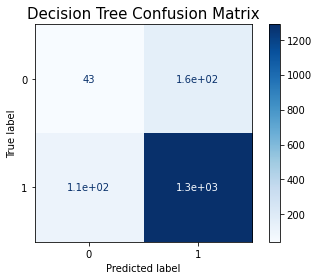

In [81]:
# DecisionTree Confusion Matrix 확인
fig, ax = plt.subplots()

pcm = plot_confusion_matrix(decision_pipe, X_val, y_val, cmap = plt.cm.Blues, ax = ax)
plt.title('Decision Tree Confusion Matrix', fontsize = 15)
plt.show()

In [82]:
# RandomForest 학습

rf_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True, cols = onehot_list),
    SimpleImputer(),
    RandomForestClassifier(
        n_jobs = -1, 
        random_state = 2)
)

rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_val)
f1 = f1_score(y_val, y_pred)

print('Validation score: ', rf_pipe.score(X_val, y_val))
print('ROC AUC score: ', roc_auc_score(y_val, y_pred))
print('f1 score: ', f1)
print(classification_report(y_val, y_pred))

Validation score:  0.8675
ROC AUC score:  0.5600657069986599
f1 score:  0.9275956284153005
              precision    recall  f1-score   support

           0       0.41      0.15      0.22       198
           1       0.89      0.97      0.93      1402

    accuracy                           0.87      1600
   macro avg       0.65      0.56      0.57      1600
weighted avg       0.83      0.87      0.84      1600



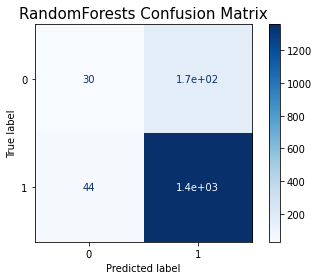

In [83]:
# RandomForest Confusion Matrix
fig, ax = plt.subplots()

pcm = plot_confusion_matrix(rf_pipe, X_val, y_val, cmap = plt.cm.Blues, ax = ax)
plt.title('RandomForests Confusion Matrix', fontsize = 15)
plt.show()

In [84]:
# RandomForest Hyper Parameter Tuning

for i in list(range(2, 11)):
  scores = cross_val_score(rf_pipe, X_train, y_train, cv = i, scoring = 'f1')
  print('k = ', i)
  print('f1 score: ', scores)
  print(f'f1 score mean: {scores.mean():,.8f}\n')

k =  2
f1 score:  [0.92068907 0.92556084]
f1 score mean: 0.92312495

k =  3
f1 score:  [0.92098512 0.9244898  0.93019688]
f1 score mean: 0.92522393

k =  4
f1 score:  [0.92412385 0.92344498 0.92674617 0.92806001]
f1 score mean: 0.92559375

k =  5
f1 score:  [0.92602041 0.92150171 0.93029151 0.92714103 0.92668372]
f1 score mean: 0.92632767

k =  6
f1 score:  [0.92707802 0.91640867 0.92668024 0.92464358 0.93047035 0.9258312 ]
f1 score mean: 0.92518534

k =  7
f1 score:  [0.92592593 0.91456077 0.93175074 0.92726198 0.92801904 0.93014925
 0.92491061]
f1 score mean: 0.92608262

k =  8
f1 score:  [0.92978868 0.91740614 0.92328767 0.92944369 0.93007468 0.93070652
 0.92779292 0.92307692]
f1 score mean: 0.92644715

k =  9
f1 score:  [0.92742552 0.9210728  0.92105263 0.92977099 0.92530488 0.93079848
 0.9309816  0.92626728 0.92331288]
f1 score mean: 0.92622078

k =  10
f1 score:  [0.93039049 0.92085106 0.91965812 0.92699491 0.927905   0.9280271
 0.9293617  0.92491468 0.92215569 0.92595745]
f1 sco

In [85]:
# 한시간 반을 돌려도 안돌아가서 포기 ...

random_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    RandomForestClassifier(random_state = 2)
)

dists = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestclassifier__n_estimators': [100, 200, 300, 400, 500],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample', None],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4, 8, 10, 12],
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None],
    'randomforestclassifier__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    random_pipe,
    param_distributions = dists,
    n_iter = 5,
    cv = 8,
    verbose = 1,
    n_jobs = -1
)

clf.fit(X_train, y_train)

print('best hyperparameter: ', clf.best_params_)
print('best f1 score: ', clf.best_score_)

Fitting 8 folds for each of 5 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   42.9s finished


best hyperparameter:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.24850332469062042, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 300, 'simpleimputer__strategy': 'median'}
best f1 score:  0.87625


In [96]:
# 최종 모델(RandomForest) 하이퍼 파라미터 튜닝

new_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True, cols = onehot_list),
    SimpleImputer(strategy = 'median'),
    RandomForestClassifier(
        n_estimators = 300,
        max_features = 0.24850332469062042,
        min_samples_leaf = 2,
        criterion = 'gini',
        n_jobs = -1, 
        random_state = 2)
)

new_pipe.fit(X_train, y_train)
y_val_pred = new_pipe.predict(X_val)
y_test_pred = new_pipe.predict(X_test)
f1_val = f1_score(y_val, y_val_pred)
f1_test = f1_score(y_test, y_test_pred)

print('validation 검증 정확도: ', new_pipe.score(X_val, y_val))
print('ROC AUC score: ', roc_auc_score(y_val, y_val_pred))
print('f1 score: ', f1_val)
print(classification_report(y_val, y_val_pred))

print('\n\n-----------------------------\n\n')

print('test 검증 정확도: ', new_pipe.score(X_test, y_test))
print('ROC AUC score: ', roc_auc_score(y_test, y_test_pred))
print('f1 score: ', f1_test)
print(classification_report(y_test, y_test_pred))

validation 검증 정확도:  0.87875
ROC AUC score:  0.5317872015446908
f1 score:  0.9348556077904634
              precision    recall  f1-score   support

           0       0.58      0.07      0.13       198
           1       0.88      0.99      0.93      1402

    accuracy                           0.88      1600
   macro avg       0.73      0.53      0.53      1600
weighted avg       0.85      0.88      0.83      1600



-----------------------------


test 검증 정확도:  0.8755
ROC AUC score:  0.517022020916188
f1 score:  0.9332618600911283
              precision    recall  f1-score   support

           0       0.48      0.04      0.07       248
           1       0.88      0.99      0.93      1752

    accuracy                           0.88      2000
   macro avg       0.68      0.52      0.50      2000
weighted avg       0.83      0.88      0.83      2000



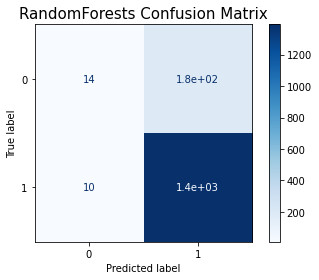

In [97]:
fig, ax = plt.subplots()

pcm = plot_confusion_matrix(new_pipe, X_val, y_val, cmap = plt.cm.Blues, ax = ax)
plt.title('RandomForests Confusion Matrix', fontsize = 15)
plt.show()

In [98]:
# RandomForest Model Permutation Importance


# permuter에서 사용할 pipe 정의
random_pipe = Pipeline([
                        ('preprocessing', make_pipeline(
                            OrdinalEncoder(cols = ord_list, mapping = ord_mapping), 
                            OneHotEncoder(cols = onehot_list),
                            SimpleImputer(strategy = 'median')
                            )
                        ),
                        ('rf', RandomForestClassifier(
                           n_estimators = 300,
                            max_features = 0.24850332469062042,
                            min_samples_leaf = 2,
                            criterion = 'gini',
                            n_jobs = -1, 
                            random_state = 2
                        ))
])

random_pipe.named_steps


{'preprocessing': Pipeline(memory=None,
          steps=[('ordinalencoder',
                  OrdinalEncoder(cols=['Income', 'Age', 'Experience',
                                       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
                                 drop_invariant=False, handle_missing='value',
                                 handle_unknown='value',
                                 mapping=[{'col': 'Income',
                                           'mapping': {'High': 3, 'Low': 1,
                                                       'Mid': 2, 'NaN': 0}},
                                          {'col': 'Age',
                                           'mapping': {'30s': 2, '4-50s': 3,
                                                       'NaN': 0, 'over 60': 4,
                                                       'under 30s': 1}},
                                          {'...
                 ('onehotencoder',
                  OneHotEncoder(cols=['Profession', 'STA

In [99]:
random_pipe.fit(X_train, y_train)
print('검증 정확도: ', random_pipe.score(X_val, y_val))

검증 정확도:  0.87875


In [100]:
# permuter 정의

permuter = PermutationImportance(
    random_pipe.named_steps['rf'],
    scoring = 'f1',
    n_iter = 5,
    random_state = 2
)

X_val_transformed = random_pipe.named_steps['preprocessing'].transform(X_val)


permuter.fit(X_val_transformed, y_val);

In [104]:
# OneHotEncoder를 사용하니 columns수가 안맞아서 못 돌린다고 해서 패스 ...
# feature_names = X_val.columns.tolist()

# 특성 score 확인
# pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [105]:
# 특성 score 보기 좋게 정리
# eli5.show_weights(
#     permuter,
#     top = None,
#     feature_names = feature_names
# )

In [107]:
# Shap으로 시각화 하기 위해 pipeline으로 만들었던 모델을 processor / model로 나눔

processor = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping), 
    OneHotEncoder(use_cat_names = True,cols = onehot_list),
    SimpleImputer(strategy = 'median')
)

X_train_processed = processor.fit_transform(X_train, y_train)
X_val_processed = processor.transform(X_val)


model = RandomForestClassifier(
    n_estimators = 300,
    max_features = 0.24850332469062042,
    min_samples_leaf = 2,
    criterion = 'gini',
    n_jobs = -1, 
    random_state = 2
)

model.fit(X_train_processed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.24850332469062042, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=-1, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [108]:
X_test_processed = processor.transform(X_test)
y_pred_proba = model.predict_proba(X_test_processed)[1]
y_test_pred = model.predict(X_test_processed)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.48      0.04      0.07       248
           1       0.88      0.99      0.93      1752

    accuracy                           0.88      2000
   macro avg       0.68      0.52      0.50      2000
weighted avg       0.83      0.88      0.83      2000



In [109]:
row = X_test.iloc[[100]]
row

,Income,Age,Experience,MarriedOrSingle,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
100,Mid,under 30s,Intermediate,single,rented,no,Society,North area,1,over 12


In [111]:
# 아무래도 OneHotEncoder를 사용하면 SHAP도 안되나보다. TargetEncoder로 다시 도전해보기

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value[0], 
    shap_values = shap_values[0], 
    features = row, 
    link = 'logit' # SHAP value를 확률로 변환해 표시합니다.
)

Exception: ignored

In [ ]:
row = X_test.iloc[[2190]]
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value[0],
    shap_values = shap_values[0],
    features = row,
    link = 'logit'
)

In [ ]:
shap_values = explainer.shap_values(X_test_processed.iloc[:500])

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_processed.iloc[:500])